In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
california=pd.read_csv("california_housing.csv")

In [3]:
house=california.copy()

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
%matplotlib inline

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

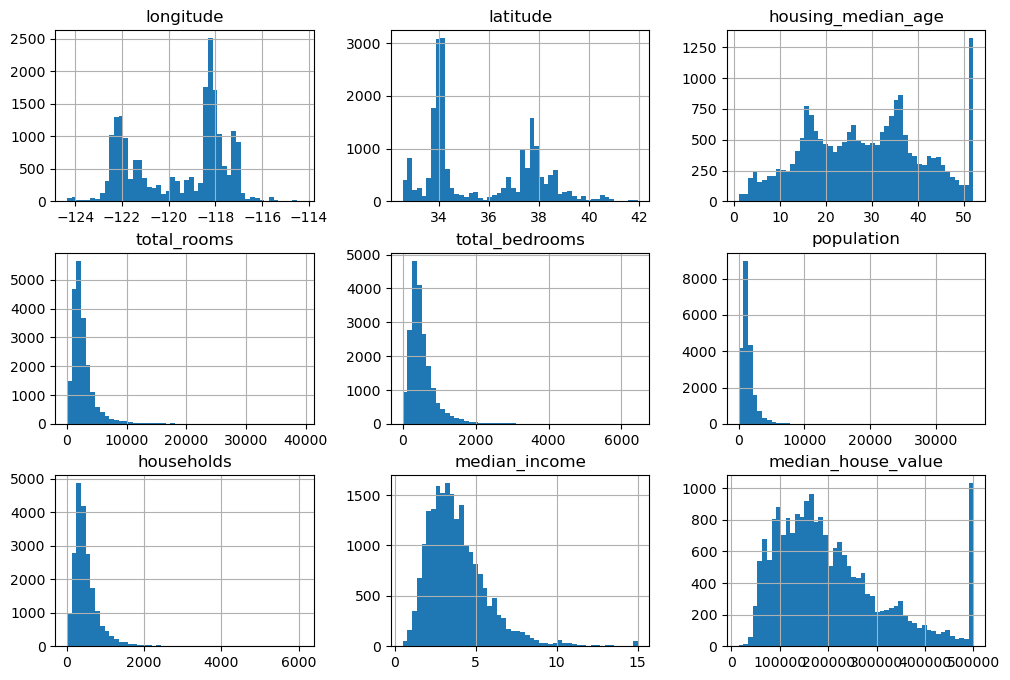

In [8]:
house.hist(bins=50, figsize=(12,8))

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
trainset, testset=train_test_split(house, test_size=0.2, random_state=1)

<Axes: >

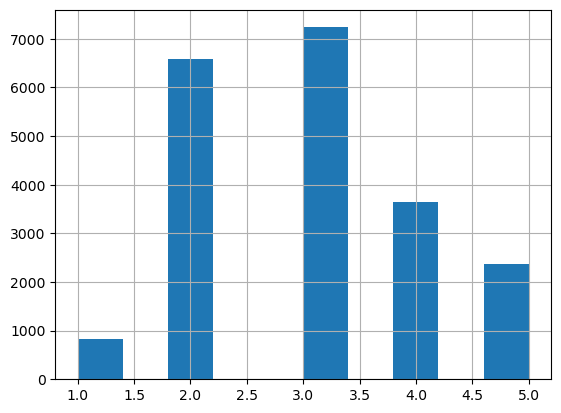

In [11]:
house["income_cat"]=pd.cut(house["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
house["income_cat"].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
for train_index, test_index in split.split(house, house["income_cat"]):
    strat_trainset=house.loc[train_index]
    strat_testset=house.loc[test_index]

In [21]:
strat_testset["income_cat"].value_counts()/strat_testset.shape[0]

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [22]:
for set_ in (strat_trainset, strat_testset):
    set_.drop("income_cat", axis=1, inplace=True)

In [23]:
housing=strat_trainset.copy()

In [24]:
import seaborn as sb

<Axes: xlabel='longitude', ylabel='latitude'>

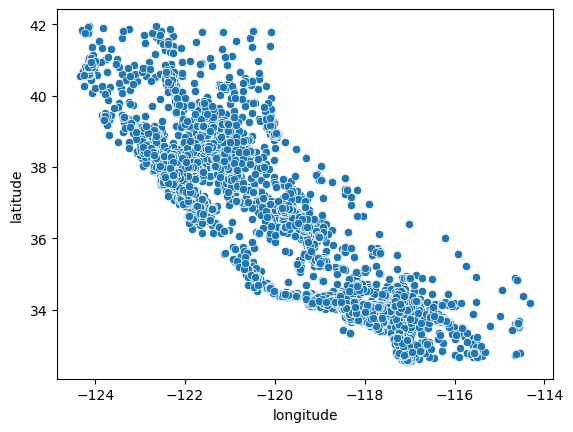

In [25]:
sb.scatterplot(x="longitude", y="latitude", data=housing)

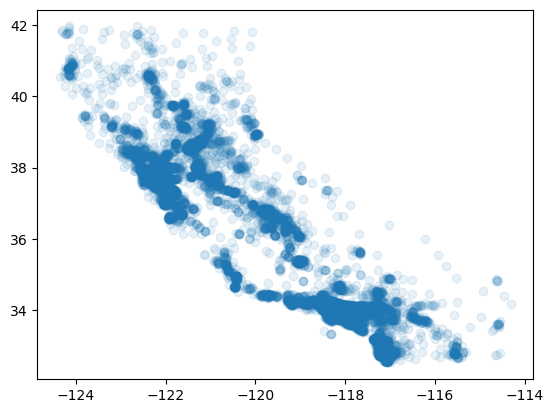

In [26]:
plt.scatter(housing["longitude"], housing["latitude"], alpha=0.1)

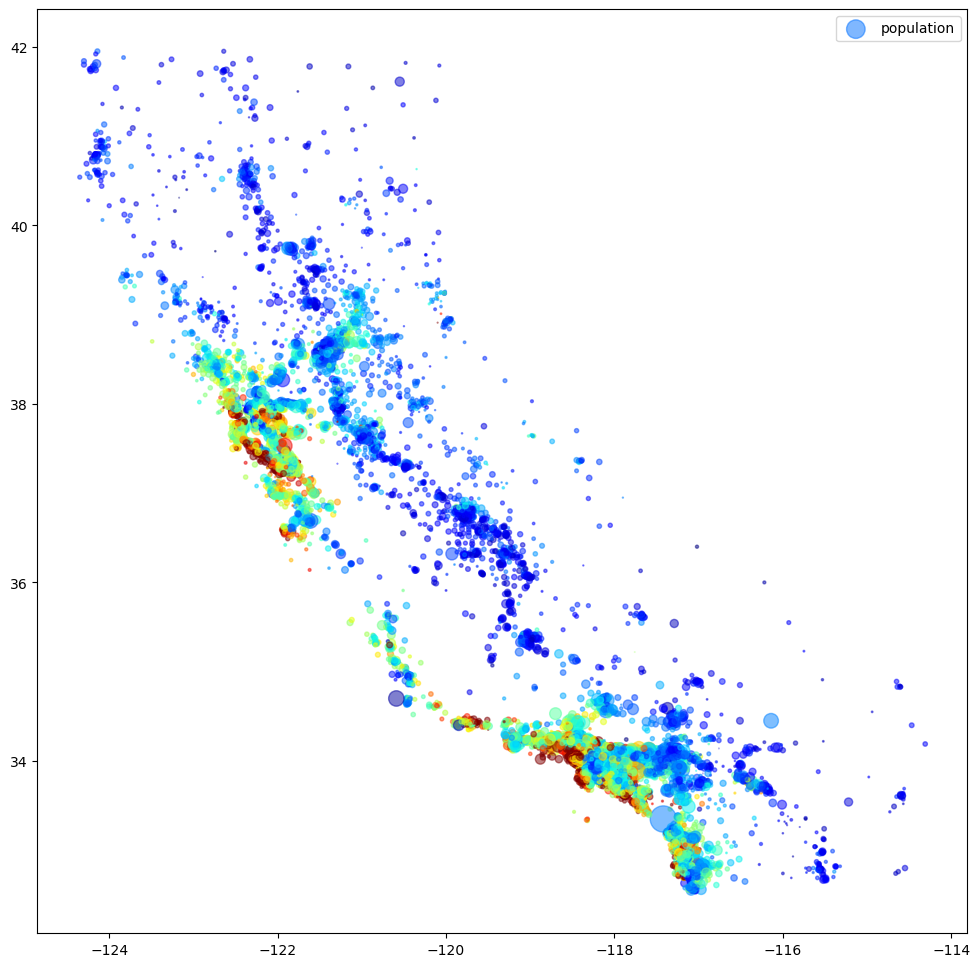

In [27]:
plt.figure(figsize=(12, 12))
plt.scatter(housing["longitude"], housing["latitude"], alpha=0.5, s=housing["population"]/100, c=housing["median_house_value"], label="population", cmap=plt.get_cmap("jet"))
plt.legend()

In [28]:
matrice = housing.drop("ocean_proximity", axis=1).corr()
matrice

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924128,-0.111498,0.044422,0.070132,0.100896,0.055791,-0.013685,-0.044005
latitude,-0.924128,1.000000,0.015784,-0.034913,-0.066246,-0.107433,-0.069473,-0.082198,-0.146596
housing_median_age,-0.111498,0.015784,1.000000,-0.361966,-0.321662,-0.301259,-0.305815,-0.115141,0.107711
total_rooms,0.044422,-0.034913,-0.361966,1.000000,0.929600,0.859187,0.917865,0.198099,0.133609
total_bedrooms,0.070132,-0.066246,-0.321662,0.929600,1.000000,0.878107,0.979825,-0.007150,0.049899
population,0.100896,-0.107433,-0.301259,0.859187,0.878107,1.000000,0.907211,0.008092,-0.025001
households,0.055791,-0.069473,-0.305815,0.917865,0.979825,0.907211,1.000000,0.013562,0.065744
median_income,-0.013685,-0.082198,-0.115141,0.198099,-0.007150,0.008092,0.013562,1.000000,0.685008
median_house_value,-0.044005,-0.146596,0.107711,0.133609,0.049899,-0.025001,0.065744,0.685008,1.000000


In [29]:
matrice["median_house_value"]

longitude            -0.044005
latitude             -0.146596
housing_median_age    0.107711
total_rooms           0.133609
total_bedrooms        0.049899
population           -0.025001
households            0.065744
median_income         0.685008
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [30]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

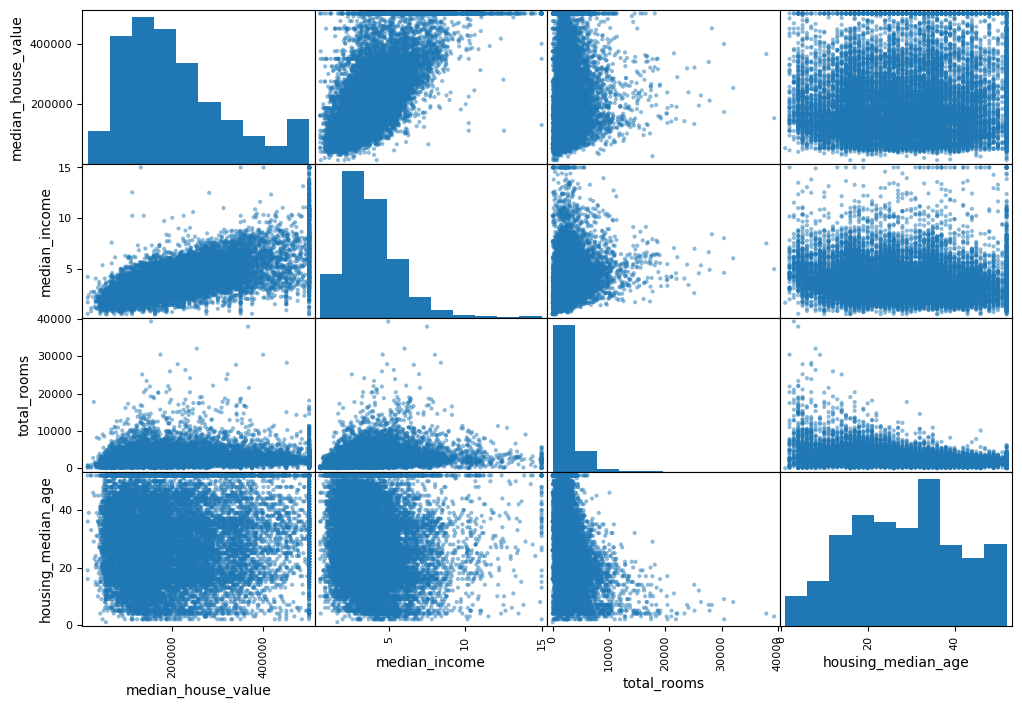

In [31]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

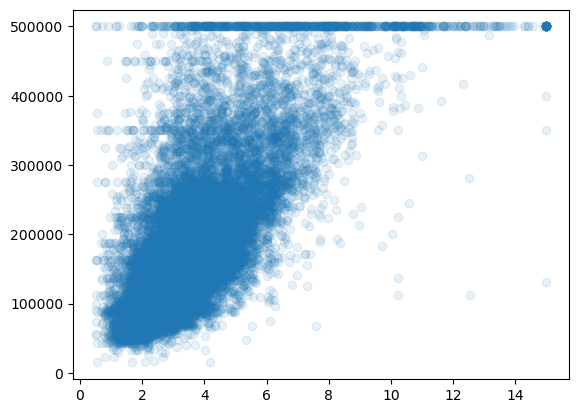

In [32]:
plt.scatter(housing["median_income"], housing["median_house_value"], alpha=0.1)

In [33]:
housing["rooms_per_households"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_households"] = housing["population"]/housing["households"]

In [34]:
correlation = housing.drop("ocean_proximity", axis=1).corr()
correlation["median_house_value"].sort_values()

bedrooms_per_rooms          -0.256756
latitude                    -0.146596
longitude                   -0.044005
population_per_households   -0.026591
population                  -0.025001
total_bedrooms               0.049899
households                   0.065744
housing_median_age           0.107711
total_rooms                  0.133609
rooms_per_households         0.172073
median_income                0.685008
median_house_value           1.000000
Name: median_house_value, dtype: float64

In [35]:
housing = strat_trainset.drop("median_house_value", axis=1)
housing_label = strat_testset["median_house_value"]

# Data cleaning

In [37]:
from  sklearn.impute import SimpleImputer

In [39]:
imputer = SimpleImputer(strategy="median")

In [40]:
housing_num = housing.drop("ocean_proximity", axis = 1)

In [41]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [42]:
imputer.statistics_

array([-118.49   ,   34.26   ,   29.     , 2123.     ,  434.     ,
       1163.     ,  409.     ,    3.52985])

In [45]:
housing_num.median().values

array([-118.49   ,   34.26   ,   29.     , 2123.     ,  434.     ,
       1163.     ,  409.     ,    3.52985])

In [46]:
X = imputer.transform(housing_num)

In [48]:
housing_tr=pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)

In [55]:
housing_cat= housing["ocean_proximity"]
housing_cat.head(10)

19466        INLAND
18145     <1H OCEAN
15241    NEAR OCEAN
4006      <1H OCEAN
2679         INLAND
10835     <1H OCEAN
12648        INLAND
3347         INLAND
4920      <1H OCEAN
6886      <1H OCEAN
Name: ocean_proximity, dtype: object

In [57]:
from sklearn.preprocessing import LabelEncoder

In [59]:
encoder = LabelEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [61]:
from sklearn.base import BaseEstimator, TransformerMixin

In [62]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [63]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedroom_per_rooms = True): # no *args or **kargs
        self.add_bedroom_per_rooms = add_bedroom_per_rooms
    def fit(self, X, y=None):
        return self #Nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix]/X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedroom_per_rooms:
            bedroom_per_rooms = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedroom_per_rooms]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [68]:
attr_adder = CombinedAttributesAdder(add_bedroom_per_rooms=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [70]:
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")), ("attribs_adder", CombinedAttributesAdder()),
                        ("std_scaler", StandardScaler())])

In [71]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [72]:
from sklearn.compose import ColumnTransformer

In [73]:
num_attributes = list(housing_num)
cat_attributes = ["ocean_proximity"]

In [74]:
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attributes), ("cat", OneHotEncoder(), cat_attributes)])

In [75]:
housing_prepared = full_pipeline.fit_transform(housing)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
housing_label.shape

(4128,)

In [78]:
lin_reg = LinearRegression()
housing_labels = strat_trainset["median_house_value"]
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [79]:
some_data = housing.iloc[: 5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [113581.90405227 379132.00965263 634209.63592607 317640.16802931
  35787.01237184]
Labels: [130300.0, 432600.0, 500001.0, 347700.0, 62200.0]


In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
print(np.sqrt(lin_mse))

68855.20839476846


In [82]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [84]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
np.sqrt(tree_mse)

0.0

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")
tree_rmse_scores = np.sqrt(-scores)

In [87]:
def display_score(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [88]:
display_score(tree_rmse_scores)

Scores: [69874.32404379 75069.9608149  70698.47025893 70111.77469485
 69258.47949173 73163.88263034 73418.18646864 73310.96577595
 72317.53798507 64660.47336314]
Mean: 71188.40555273418
Standard deviation: 2813.993601672554


In [89]:
lin_reg_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")
lin_rmse_scores = np.sqrt(-lin_reg_scores)

In [90]:
display_score(lin_rmse_scores)

Scores: [70868.05560682 74009.3794178  70204.63871392 69548.24378348
 68876.79728179 72534.70861852 74004.18038296 74085.47438599
 73905.04918973 65545.15722685]
Mean: 71358.16846078486
Standard deviation: 2722.7617558030342


In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
forest_reg = RandomForestRegressor(random_state=1)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=1)

In [94]:
forest_score = cross_val_score(forest_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")
forest_rmse = np.sqrt(-forest_score)
forest_rmse

array([51539.40129605, 51434.20326643, 50215.97905344, 49400.97329245,
       48545.81083679, 49618.86001894, 51729.12371991, 49889.18769424,
       53250.68164258, 47676.600813  ])

In [95]:
display_score(forest_rmse)

Scores: [51539.40129605 51434.20326643 50215.97905344 49400.97329245
 48545.81083679 49618.86001894 51729.12371991 49889.18769424
 53250.68164258 47676.600813  ]
Mean: 50330.082163383224
Standard deviation: 1580.1844796988385


In [100]:
import joblib

In [103]:
from sklearn.model_selection import GridSearchCV

In [109]:
param_grid = [{
    "n_estimators":[3, 10, 30],
    "max_features":[2, 4, 6, 8]},
              {"bootstrap":[False], "n_estimators":[3, 10], "max_features":[2, 3, 4]}]

In [118]:
forest_reg = RandomForestRegressor()

In [132]:
grid = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [135]:
grid.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [136]:
grid.best_params_

{'max_features': 8, 'n_estimators': 30}

In [140]:
grid.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [141]:
np.sqrt(-grid.best_score_)

50162.80551833089

In [142]:
cvres = grid.cv_results_
for result, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-result), params)

63781.513907872235 {'max_features': 2, 'n_estimators': 3}
55536.84468902629 {'max_features': 2, 'n_estimators': 10}
52639.39052081064 {'max_features': 2, 'n_estimators': 30}
59542.391316670386 {'max_features': 4, 'n_estimators': 3}
53206.549380398035 {'max_features': 4, 'n_estimators': 10}
50435.61371737495 {'max_features': 4, 'n_estimators': 30}
60033.57218880609 {'max_features': 6, 'n_estimators': 3}
52503.06152952313 {'max_features': 6, 'n_estimators': 10}
50480.2377764261 {'max_features': 6, 'n_estimators': 30}
59447.2832432639 {'max_features': 8, 'n_estimators': 3}
52385.59909075721 {'max_features': 8, 'n_estimators': 10}
50162.80551833089 {'max_features': 8, 'n_estimators': 30}
61860.31490583681 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53875.44094586454 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60356.28042087471 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52220.719839379984 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [143]:
feature_importances = grid.best_estimator_.feature_importances_

In [144]:
X_test= strat_testset.drop("median_house_value", axis=1)
y_test = housing_label

In [145]:
final_model = grid.best_estimator_

In [146]:
X_test_prepared = full_pipeline.transform(X_test)

In [147]:
final_predictions = final_model.predict(X_test_prepared)

In [148]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [149]:
final_rmse

47408.61408566641

In [150]:
from scipy import stats

In [151]:
confidence = 0.95

In [152]:
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([45393.77562781, 49341.24555886])